### Author: Carmen Alonso Martínez

# Pivotación de tablas

Vamos a ver cómo transformar las tablas de formato ancho a largo y viceversa

In [2]:
import pandas as pd
import numpy as np

In [3]:
air = pd.read_csv("dat/airquality.csv")
air.head()

,ozone,wind,temp,month,day,solar_r
0,41.0,7.4,67,5,1,190.0
1,36.0,8.0,72,5,2,118.0
2,12.0,12.6,74,5,3,149.0
3,18.0,11.5,62,5,4,313.0
4,NaN,14.3,56,5,5,NaN


In [4]:
len(air)

153

## Melt: de ancho a largo

Para pasar de formato ancho a largo, podemos usar [`melt`](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.melt.html)

In [5]:
air_long = air.melt(id_vars=['month', 'day'])
air_long.head(len(air_long))

,month,day,variable,value
0,5,1,ozone,41.0
1,5,2,ozone,36.0
2,5,3,ozone,12.0
3,5,4,ozone,18.0
4,5,5,ozone,NaN
...,...,...,...,...
607,9,26,solar_r,193.0
608,9,27,solar_r,145.0
609,9,28,solar_r,191.0
610,9,29,solar_r,131.0


Vemos que, para cada mes y día, ahora contamos con dos columnas: la variable medida y su valor.

En el formato largo, cada fila cuenta con el índice (en este caso, mes y día), un valor, y etiquetas del valor.

#### Ejercicio

Investiga y cambia los nombres de las columnas resultantes (variable y value) por otros que consideres adecuados, durante el proceso de `melt`.

In [5]:
air_long = air.melt(id_vars=['month', 'day'],var_name='variable', value_name='value')
air_long.head(len(air_long))

,month,day,variable,value
0,5,1,ozone,41.0
1,5,2,ozone,36.0
2,5,3,ozone,12.0
3,5,4,ozone,18.0
4,5,5,ozone,NaN
...,...,...,...,...
607,9,26,solar_r,193.0
608,9,27,solar_r,145.0
609,9,28,solar_r,191.0
610,9,29,solar_r,131.0


## Pivot: de largo a ancho

Para pasar de formato largo a ancho, podemos usar [`pivot_table`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html)

In [12]:
air_wide = air_long.pivot_table(index=['month', 'day'], columns='variable', values='value')
air_wide.head()

variable   ozone  solar_r  temp  wind
month day                            
5     1     41.0    190.0  67.0   7.4
      2     36.0    118.0  72.0   8.0
      3     12.0    149.0  74.0  12.6
      4     18.0    313.0  62.0  11.5
      5      NaN      NaN  56.0  14.3

Los índices jerárquicos suelen ser incómodos para tratar la tabla. Podemos quitarlo con `reset_index()`

In [14]:
air_wide = air_wide.reset_index()
air_wide.head()

variable,month,day,ozone,solar_r,temp,wind
0,5,1,41.0,190.0,67.0,7.4
1,5,2,36.0,118.0,72.0,8.0
2,5,3,12.0,149.0,74.0,12.6
3,5,4,18.0,313.0,62.0,11.5
4,5,5,NaN,NaN,56.0,14.3


In [17]:
# # Si además queremos quitar el nombre "feo" que se ha quedado como nombre de las columnas...
del air_wide.columns.name
air_wide.head()

SyntaxError: cannot delete function call (<ipython-input-17-2d982bcd1d3f>, line 2)

In [22]:
# Si además queremos quitar el nombre "feo" que se ha quedado como nombre de las columnas...
air_wide = air_wide.rename_axis(None, axis=1)
air_wide.head()

,month,day,ozone,solar_r,temp,wind
0,5,1,41.0,190.0,67.0,7.4
1,5,2,36.0,118.0,72.0,8.0
2,5,3,12.0,149.0,74.0,12.6
3,5,4,18.0,313.0,62.0,11.5
4,5,5,NaN,NaN,56.0,14.3


In [11]:
len(air_wide)

153

#### Ejercicio

La función [`pivot_table`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) permite agregar si hay más de un valor por cada fila (es decir, un mismo índice para varios valores de la variable).

Aprovecha esta utilidad para, en el paso de `air_long` a ancho, calcular la mediana por variable por mes.

In [24]:
air_wide2 = air_long.pivot_table(index=['month', 'day'], columns='variable', values='value',aggfunc='median').reset_index()
air_wide2.head()

variable,month,day,ozone,solar_r,temp,wind
0,5,1,41.0,190.0,67.0,7.4
1,5,2,36.0,118.0,72.0,8.0
2,5,3,12.0,149.0,74.0,12.6
3,5,4,18.0,313.0,62.0,11.5
4,5,5,NaN,NaN,56.0,14.3


In [25]:
air_long.pivot_table(index=['month', 'day'], columns='variable', values='value',aggfunc=['mean','max'])

mean                       max                    
variable  ozone solar_r  temp  wind ozone solar_r  temp  wind
month day                                                    
5     1    41.0   190.0  67.0   7.4  41.0   190.0  67.0   7.4
      2    36.0   118.0  72.0   8.0  36.0   118.0  72.0   8.0
      3    12.0   149.0  74.0  12.6  12.0   149.0  74.0  12.6
      4    18.0   313.0  62.0  11.5  18.0   313.0  62.0  11.5
      5     NaN     NaN  56.0  14.3   NaN     NaN  56.0  14.3
...         ...     ...   ...   ...   ...     ...   ...   ...
9     26   30.0   193.0  70.0   6.9  30.0   193.0  70.0   6.9
      27    NaN   145.0  77.0  13.2   NaN   145.0  77.0  13.2
      28   14.0   191.0  75.0  14.3  14.0   191.0  75.0  14.3
      29   18.0   131.0  76.0   8.0  18.0   131.0  76.0   8.0
      30   20.0   223.0  68.0  11.5  20.0   223.0  68.0  11.5

[153 rows x 8 columns]

#### Ejercicio

Carga en un dataframe el fichero `dat/contaminacion_mad_201812.csv`, y mira qué aspecto tiene. Nuestro objetivo es dejarlo en formato largo, y quedarnos únicamente con los días con una medida válida. Para hacerlo:

* A partir de ese dataframe, crea dos nuevos:

    * Uno con el índice + las columnas con los valores (D01, ..., D31)
    * Otro con el índice + las columnas con la validez (V01, ..., V31)

* Pasa ambos a formato largo. El día debe quedar como numérico en ambos.
* Cruza los resultados, para tener en el mismo dataframe valor y validez
* Limpia la fecha, para tenerla como `date`

#### Referencia

Puedes consultar la guía completa de pandas sobre pivotación [aquí](http://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html)

# Cuándo es útil?

In [26]:
df_flights = pd.read_csv("dat/flights.csv")
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [27]:
df_flights.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [28]:
df_flights = df_flights[['Origin','Dest']]
df_flights.head()

,Origin,Dest
0,IAD,TPA
1,IAD,TPA
2,IND,BWI
3,IND,BWI
4,IND,BWI


In [29]:
df_flights = df_flights.groupby(['Origin','Dest']).size().reset_index(name='count')
df_flights.head()

# Puedes usar size() o count() para contar. 
# ¡Cuidado! Estamos sobreescribiendo el data.frame, así que si volvemos a ejecutar este cuadro, contará las combinaciones en el 
# data.frame sobreescrito y dará 1 en todas las filas. Lo que puedes hacer para evitarlo es renombrar la variable, pero entonces
# hay que renombrarlo en todos los demás cuadros que le siguen.

,Origin,Dest,count
0,ABQ,AMA,28
1,ABQ,AUS,57
2,ABQ,BWI,28
3,ABQ,DAL,233
4,ABQ,DEN,84


In [43]:
df_flights = df_flights.pivot_table(index='Origin', columns='Dest', values='count')
df_flights.head()

Dest,ABQ,ALB,AMA,ATL,AUS,BDL,BFL,BHM,BNA,BOI,...,SJC,SLC,SMF,SNA,STL,SYR,TPA,TUL,TUS,XNA
Origin,,,,,,,,,,,,,,,,,,,,,
ABQ,NaN,NaN,28.0,NaN,57.0,NaN,NaN,NaN,NaN,NaN,...,NaN,56.0,61.0,NaN,28.0,NaN,28.0,32.0,57.0,NaN
ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,28.0,NaN,NaN,NaN
AMA,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AUS,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,28.0,NaN,31.0,NaN
BDL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,56.0,NaN,NaN,NaN


In [44]:
df_flights = df_flights.fillna(0)
df_flights.head()

Dest,ABQ,ALB,AMA,ATL,AUS,BDL,BFL,BHM,BNA,BOI,...,SJC,SLC,SMF,SNA,STL,SYR,TPA,TUL,TUS,XNA
Origin,,,,,,,,,,,,,,,,,,,,,
ABQ,0.0,0.0,28.0,0.0,57.0,0.0,0.0,0.0,0.0,0.0,...,0.0,56.0,61.0,0.0,28.0,0.0,28.0,32.0,57.0,0.0
ALB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,28.0,0.0,0.0,0.0
AMA,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AUS,58.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,28.0,0.0,31.0,0.0
BDL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0


In [45]:
df_flights.shape # Se usa para saber qué tamaño le tenemos que dar al heatmap.

(82, 81)

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

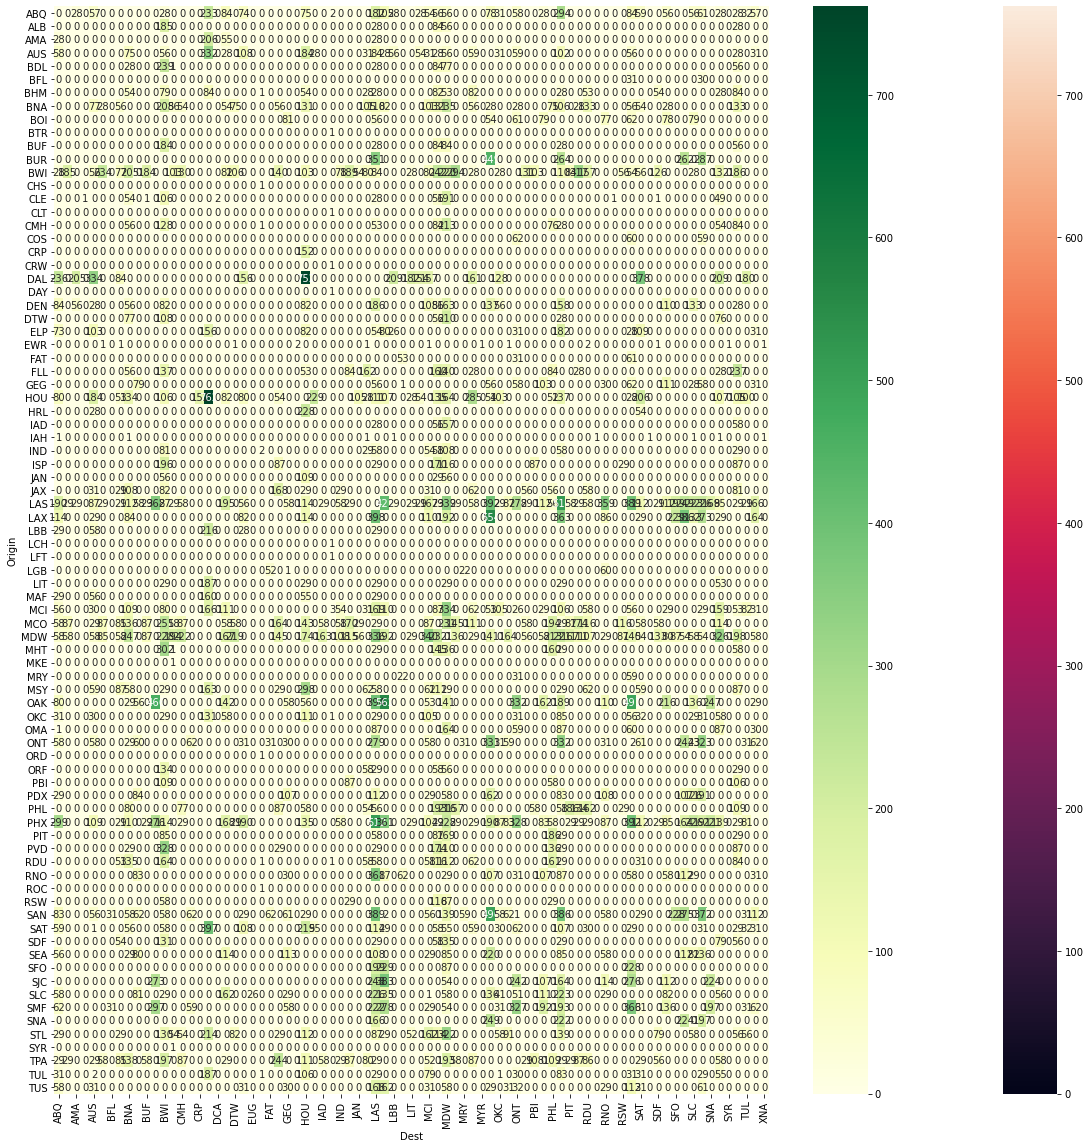

In [47]:
plt.figure(figsize=(20,20)) # Cambia el tamaño de la gráfica. Se usa plt porque sns está hecho con plt.
sns.heatmap(df_flights,linewidths=.1)
sns.heatmap(df_flights, cmap="YlGn", annot= True, fmt=".0f") # Cambia el color.

# Tarda en cargar.